In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!cp drive/MyDrive/mnist_model/pytorch_train_model.py .
!cp drive/MyDrive/mnist_model/pytorch_eval_model.py .
!cp drive/MyDrive/mnist_model/pytorch_model_class.py .
!cp drive/MyDrive/mnist_model/data_loader.py .

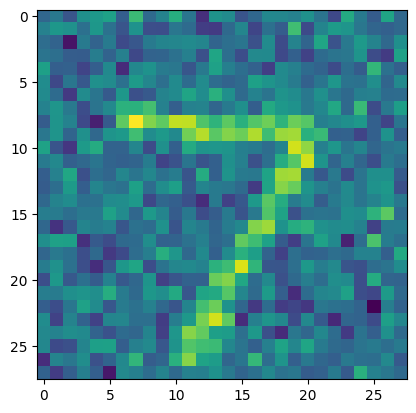

In [3]:
from pytorch_train_model import DEVICE

In [4]:
DEVICE

device(type='cuda')

In [12]:
import pytorch_model_class
digit_model = pytorch_model_class.NetReluShallow(D_in=28 * 28, H1=100, H2=100, D_out=10).to(DEVICE)
digit_model.load_model(path = 'drive/MyDrive/mnist_model/saved_models')

created model:  NetReluShallow_MEC_78700_DIM_784_100_100_10


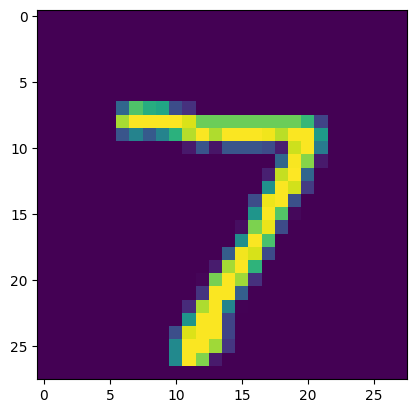

In [13]:
import data_loader
train_data, validation_data = data_loader.load_mnist_data(train_noise = False, validation_noise = False)
train_loader, validation_loader = data_loader.create_data_loader(train_data, validation_data)

In [ ]:
import torch
validation_correct = 0
activation = torch.nn.Softmax(dim=0)
for x, y in validation_loader:
  x = x.to(DEVICE)
  y = y.to(DEVICE)
  z = digit_model(x.view(-1, 28 * 28).to(DEVICE))
  _, label = torch.max(z, 1)
  for k in range(len(label)):
    if label[k] != y[k]:
      t = activation(z[k])
      print(t[y[k]] in sorted(t)[-3:])
  break
  validation_correct += (label == y).sum().item()